# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Loading Dataset

In [3]:
df = pd.read_csv("dataset/Motor_Vehicle_Collisions.csv")

<ipython-input-3-4e57de93912b>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("drive/MyDrive/MidTermPython/Motor_Vehicle_Collisions.csv")


# Dataset Preparation

**Renaming columns**

In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [5]:
df.head(10)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


**Some useful information**

In [6]:
print('Shape of the DataFrame (rows/columns):', df.shape)

Shape of the DataFrame (rows/columns): (2034019, 29)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034019 entries, 0 to 2034018
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   crash_date                     object 
 1   crash_time                     object 
 2   borough                        object 
 3   zip_code                       object 
 4   latitude                       float64
 5   longitude                      float64
 6   location                       object 
 7   on_street_name                 object 
 8   cross_street_name              object 
 9   off_street_name                object 
 10  number_of_persons_injured      float64
 11  number_of_persons_killed       float64
 12  number_of_pedestrians_injured  int64  
 13  number_of_pedestrians_killed   int64  
 14  number_of_cyclist_injured      int64  
 15  number_of_cyclist_killed       int64  
 16  number_of_motorist_injured     int64  
 17  number_of_motorist_killed      int64  
 18  co

In [8]:
df.isna().sum()

crash_date                             0
crash_time                             0
borough                           632787
zip_code                          633028
latitude                          230884
longitude                         230884
location                          230884
on_street_name                    429166
cross_street_name                 763510
off_street_name                  1697226
number_of_persons_injured             18
number_of_persons_killed              31
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1       6442
contributing_factor_vehicle_2     311455
contributing_factor_vehicle_3    1889497
contributing_factor_vehicle_4    2001552
contributing_factor_vehicle_5    2025235
collision_id                           0
vehicle_type_cod

In [9]:
(df.isna().sum() / len(df) * 100).round(2).sort_values(ascending = False)

vehicle_type_code_5              99.58
contributing_factor_vehicle_5    99.57
vehicle_type_code_4              98.46
contributing_factor_vehicle_4    98.40
vehicle_type_code_3              93.15
contributing_factor_vehicle_3    92.89
off_street_name                  83.44
cross_street_name                37.54
zip_code                         31.12
borough                          31.11
on_street_name                   21.10
vehicle_type_code_2              18.79
contributing_factor_vehicle_2    15.31
location                         11.35
longitude                        11.35
latitude                         11.35
vehicle_type_code_1               0.64
contributing_factor_vehicle_1     0.32
collision_id                      0.00
crash_date                        0.00
number_of_motorist_killed         0.00
number_of_motorist_injured        0.00
number_of_cyclist_killed          0.00
crash_time                        0.00
number_of_pedestrians_killed      0.00
number_of_pedestrians_inj

**Removing NaN values**

In [10]:
df = df.drop(columns = [
    'vehicle_type_code_5',
    'contributing_factor_vehicle_5',
    'vehicle_type_code_4',
    'contributing_factor_vehicle_4',
    'vehicle_type_code_3',
    'contributing_factor_vehicle_3',
    'off_street_name',
    'zip_code'
    ])

df.drop('location', axis = 1, inplace = True)

In [11]:
(df.isna().sum() / len(df) * 100).round(2).sort_values(ascending = False)

cross_street_name                37.54
borough                          31.11
on_street_name                   21.10
vehicle_type_code_2              18.79
contributing_factor_vehicle_2    15.31
latitude                         11.35
longitude                        11.35
vehicle_type_code_1               0.64
contributing_factor_vehicle_1     0.32
number_of_motorist_injured        0.00
collision_id                      0.00
number_of_motorist_killed         0.00
crash_date                        0.00
number_of_cyclist_killed          0.00
number_of_cyclist_injured         0.00
crash_time                        0.00
number_of_pedestrians_injured     0.00
number_of_persons_killed          0.00
number_of_persons_injured         0.00
number_of_pedestrians_killed      0.00
dtype: float64

In [12]:
print('Before cleaning:', df.shape)
df = df.dropna()
print('After cleaning:', df.shape)

Before cleaning: (2034019, 20)
After cleaning: (880392, 20)


**Transforming objects to DateTime**

In [13]:
# datetime for ['crash_date']
df['crash_date'] = pd.to_datetime(df['crash_date'])

#  df.time for ['crash_time']
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M').dt.time

# making 'crash_hour'
df['crash_hour'] = df['crash_time'].apply(lambda x: x.strftime('%H')).astype(int)

In [14]:
df['day'] = df['crash_date'].dt.day
df['month'] = df['crash_date'].dt.month
df['year'] = df['crash_date'].dt.year

In [15]:
df['consequences_of_an_accident'] = df[[
    'number_of_persons_injured',
    'number_of_persons_killed',
    'number_of_pedestrians_injured',
    'number_of_pedestrians_killed',
    'number_of_cyclist_injured',
    'number_of_cyclist_killed',
    'number_of_motorist_injured',
    'number_of_motorist_killed'
    ]].sum(axis=1)

**Showing prepared dataset**

In [16]:
display(df.head())
print(df.info())

,crash_date,crash_time,borough,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,...,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_hour,day,month,year,consequences_of_an_accident
9,2021-12-14,14:58:00,MANHATTAN,40.751440,-73.973970,3 AVENUE,EAST 43 STREET,0.0,0.0,0,...,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,14,14,12,2021,0.0
11,2021-12-14,16:50:00,QUEENS,40.675884,-73.755770,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,...,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle,16,14,12,2021,0.0
14,2021-12-14,23:10:00,QUEENS,40.666840,-73.789410,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,...,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan,23,14,12,2021,4.0
18,2021-12-11,19:43:00,BRONX,40.872620,-73.904686,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,...,Unspecified,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,Sedan,19,11,12,2021,2.0
24,2021-12-13,17:40:00,STATEN ISLAND,40.631650,-74.087620,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,...,Unspecified,Unspecified,4487001,Sedan,Sedan,17,13,12,2021,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 880392 entries, 9 to 2034017
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     880392 non-null  datetime64[ns]
 1   crash_time                     880392 non-null  object        
 2   borough                        880392 non-null  object        
 3   latitude                       880392 non-null  float64       
 4   longitude                      880392 non-null  float64       
 5   on_street_name                 880392 non-null  object        
 6   cross_street_name              880392 non-null  object        
 7   number_of_persons_injured      880392 non-null  float64       
 8   number_of_persons_killed       880392 non-null  float64       
 9   number_of_pedestrians_injured  880392 non-null  int64         
 10  number_of_pedestrians_killed   880392 non-null  int64         
 11 

# Descriptive stats

In [17]:
print(
    "Number of motorists injured:",
    f"  Mean: {df['number_of_motorist_injured'].mean()}",
    f"  Median: {(df['number_of_motorist_injured'].max() + df['number_of_motorist_injured'].min()) / 2}",
    f"  Standart deviation: {df['number_of_motorist_injured'].std()}",
    sep='\n', end='\n\n')

print(
    "Number of pedestrians injured:",
    f"  Mean: {df['number_of_pedestrians_injured'].mean()}",
    f"  Median: {(df['number_of_pedestrians_injured'].max() + df['number_of_pedestrians_injured'].min()) / 2}",
    f"  Standart deviation: {df['number_of_pedestrians_injured'].std()}",
    sep='\n', end='\n\n')

print(
    "Number of cyclists injured:",
    f"  Mean: {df['number_of_cyclist_injured'].mean()}",
    f"  Median: {(df['number_of_cyclist_injured'].max() + df['number_of_cyclist_injured'].min()) / 2}",
    f"  Standart deviation: {df['number_of_cyclist_injured'].std()}",
    sep='\n')

Number of motorists injured:
  Mean: 0.2352111332224736
  Median: 21.5
  Standart deviation: 0.6903676519073746

Number of pedestrians injured:
  Mean: 0.0029668602168125106
  Median: 7.5
  Standart deviation: 0.06812785250106211

Number of cyclists injured:
  Mean: 0.03439831347854138
  Median: 2.0
  Standart deviation: 0.1842028728786876


# Analytics

**Number of traffic accidents depending on the city district**

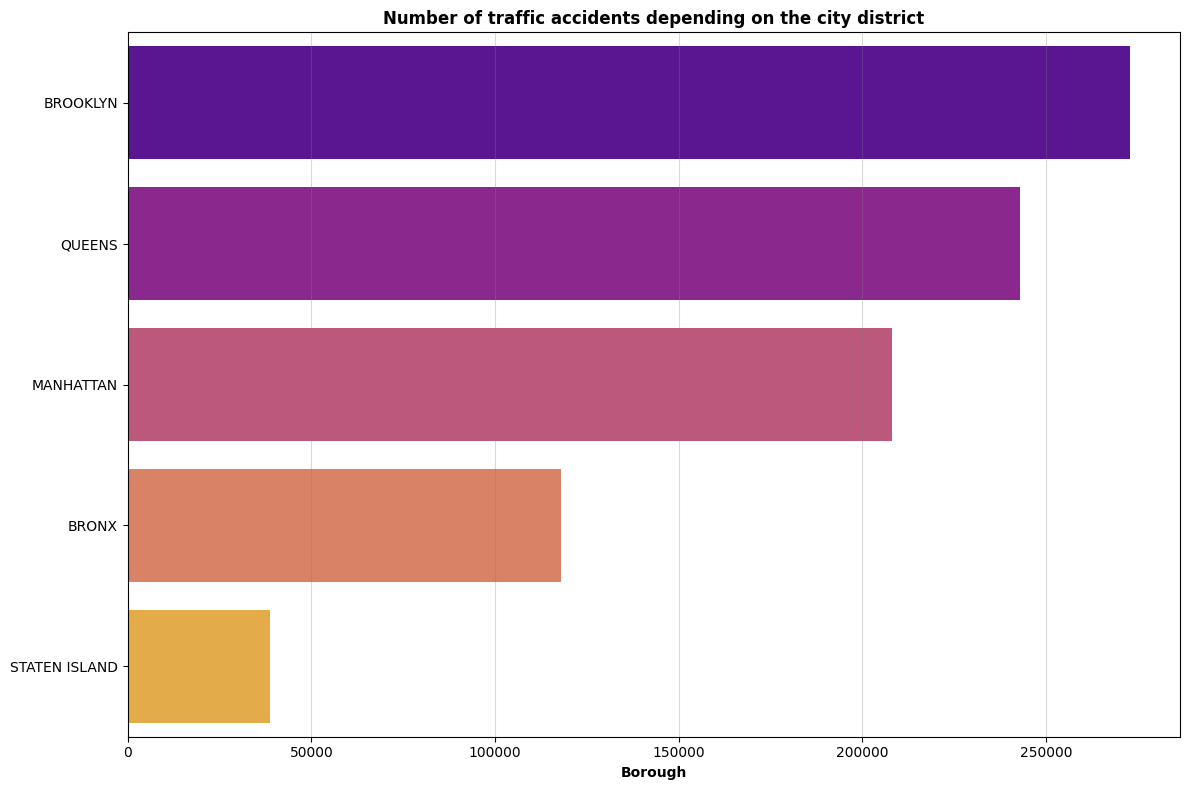

In [18]:
borough_accidents = df.borough.value_counts()

plt.figure(figsize = (12,8))
sns.barplot(x=borough_accidents, y=borough_accidents.index, palette='plasma')

plt.title('Number of traffic accidents depending on the city district', fontweight = 'bold')

plt.grid(True, alpha = 0.3, color = 'grey', axis = 'x')
plt.xlabel("Borough", fontweight = 'bold')

plt.tight_layout()
plt.show()

**Road accidents by time**

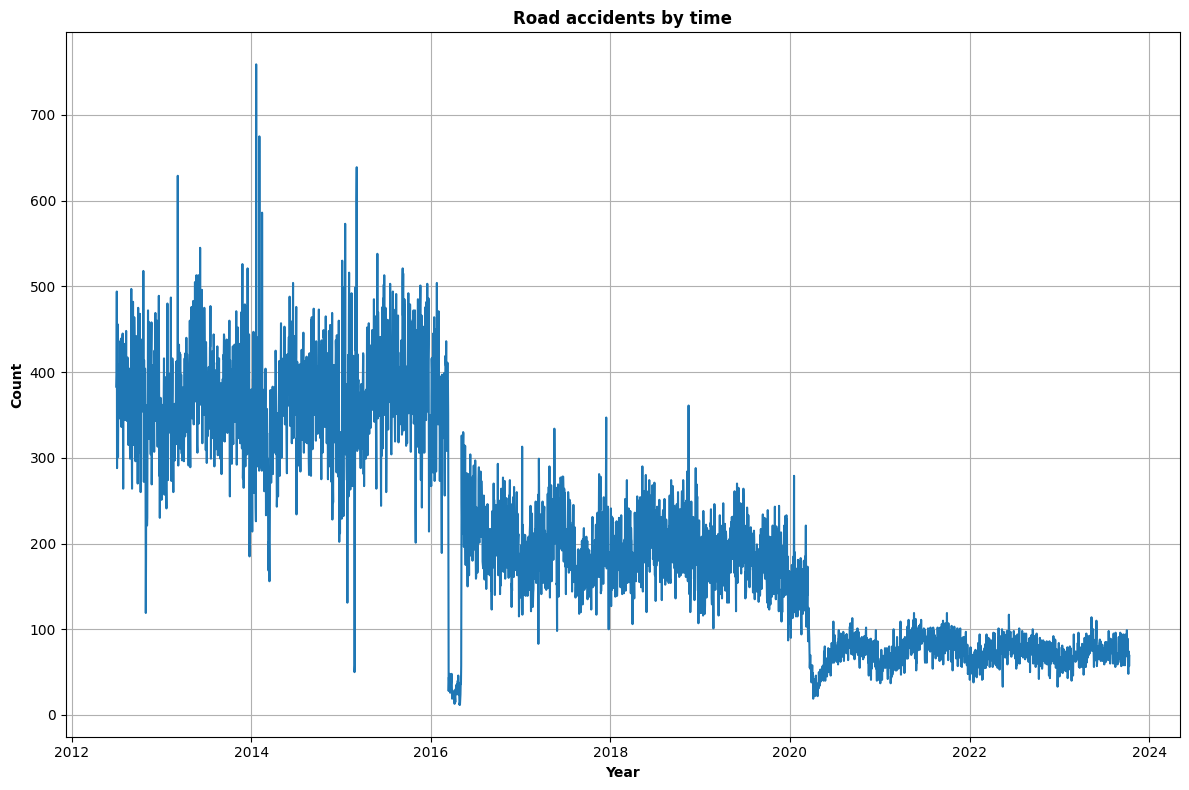

In [19]:
plt.figure(figsize = (12,8))

sns.lineplot(df['crash_date'].value_counts())
plt.title('Road accidents by time', fontweight = 'bold')
plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Count", fontweight = 'bold')

plt.grid(True)

plt.tight_layout()
plt.show()

**Road accidents by day of the week**

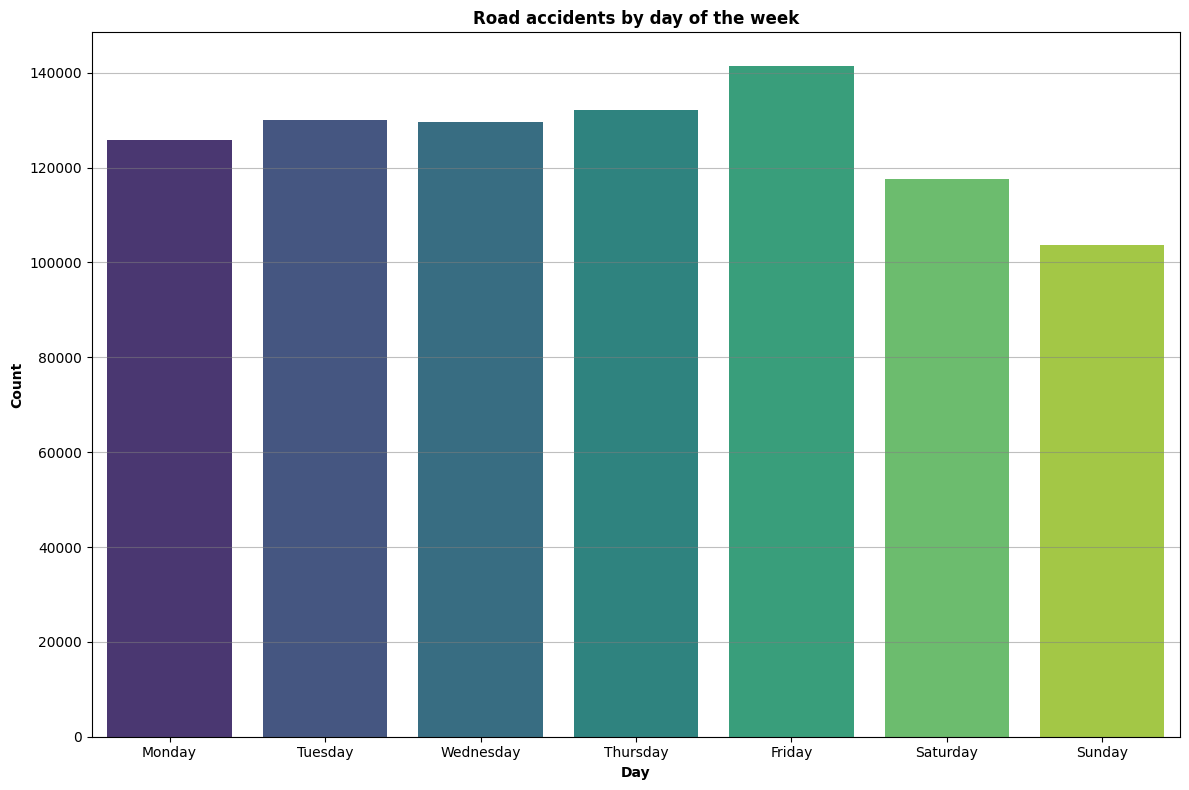

In [20]:
# Calculate the day of the week and reorder it starting from Monday
days = df['crash_date'].dt.day_name().value_counts()
days = days.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 8))
sns.barplot(y=days, x=days.index, palette='viridis')

plt.title('Road accidents by day of the week', fontweight='bold')
plt.xlabel('Day', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.grid(True, alpha = 0.5, color = 'grey', axis = 'y')

plt.tight_layout()
plt.show()

**Car Accidents by Hour**

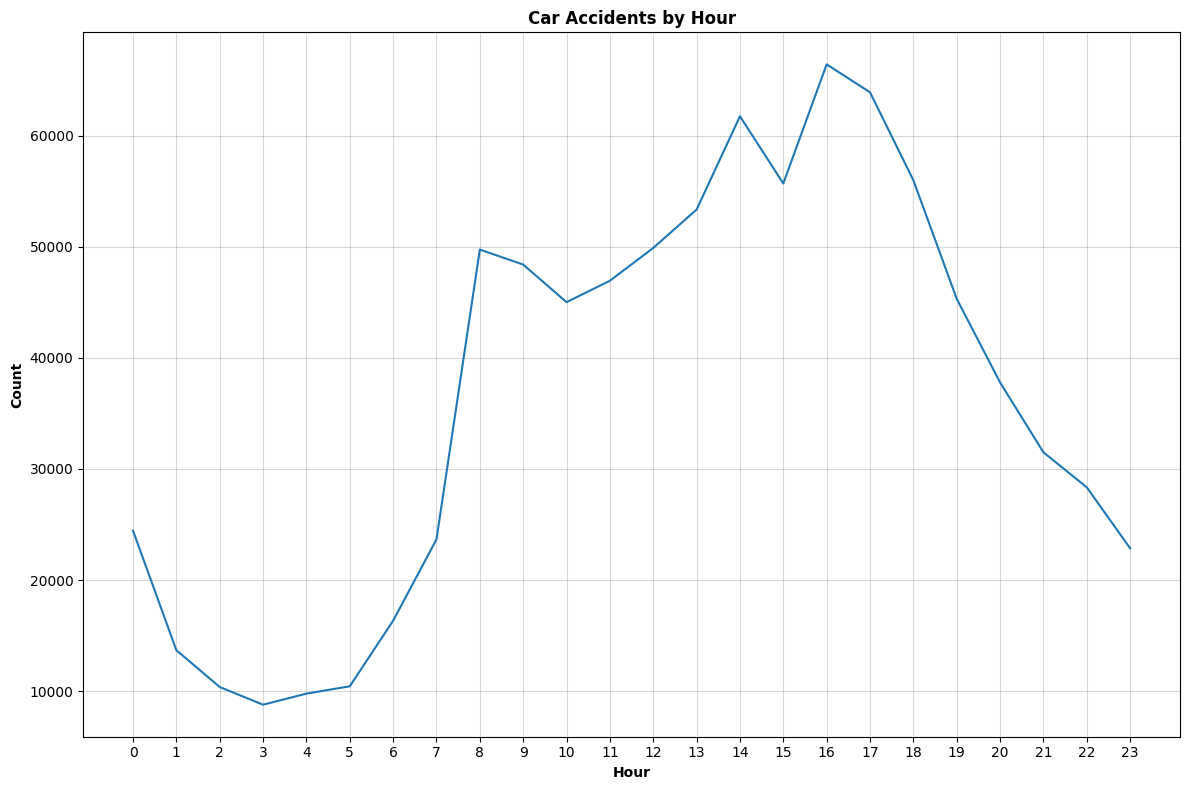

In [21]:
all_hours = list(range(24))

# Count the accidents by hour
hour_counts = df['crash_hour'].value_counts().reindex(all_hours)

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x=hour_counts.index, y=hour_counts)

plt.title('Car Accidents by Hour', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Hour', fontweight='bold')

plt.grid(True, alpha=0.3, color='grey')
plt.xticks(all_hours)


plt.tight_layout()
plt.show()

**Road accidents by month**

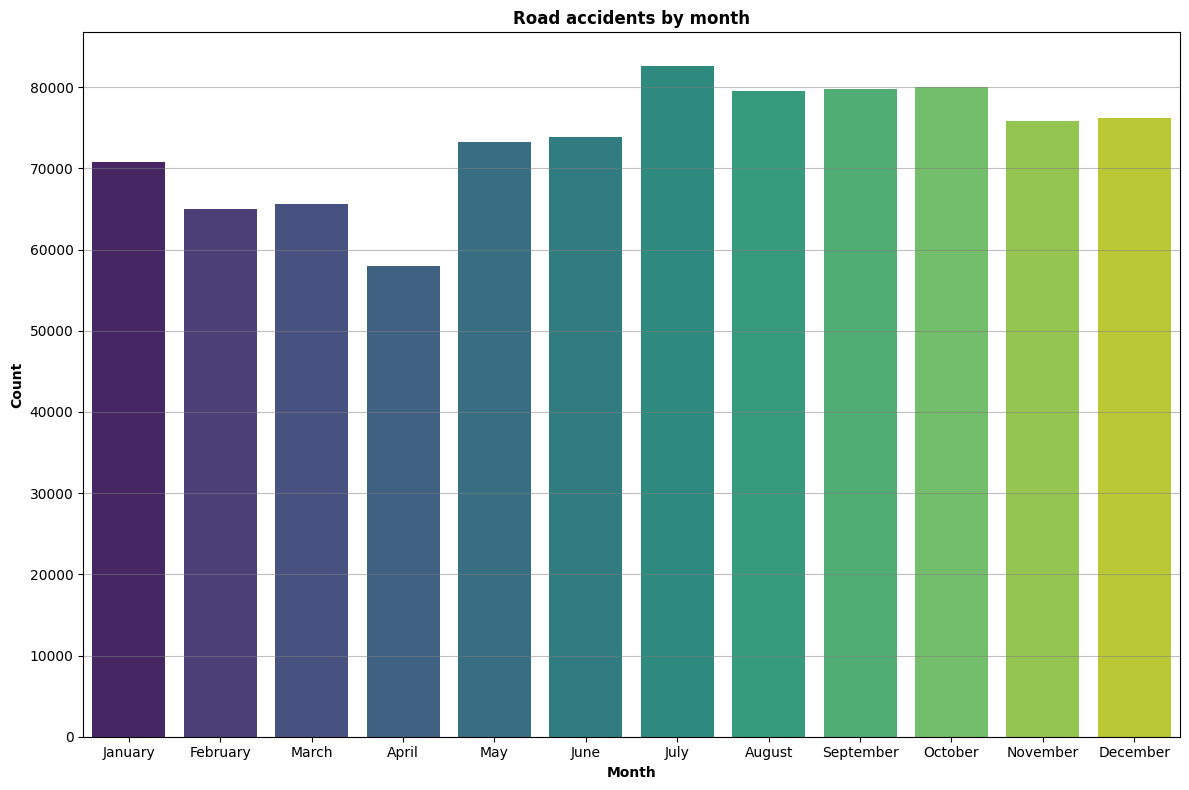

In [22]:
# Calculate the month and reorder it starting from Monday
months = df['crash_date'].dt.month_name().value_counts()
months = months.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 8))
sns.barplot(y=months, x=months.index, palette = 'viridis')

plt.title('Road accidents by month', fontweight='bold')
plt.xlabel('Month', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.grid(True, alpha = 0.5, color = 'grey', axis = 'y')

plt.tight_layout()
plt.show()

**Distribution of consequences in accidents**

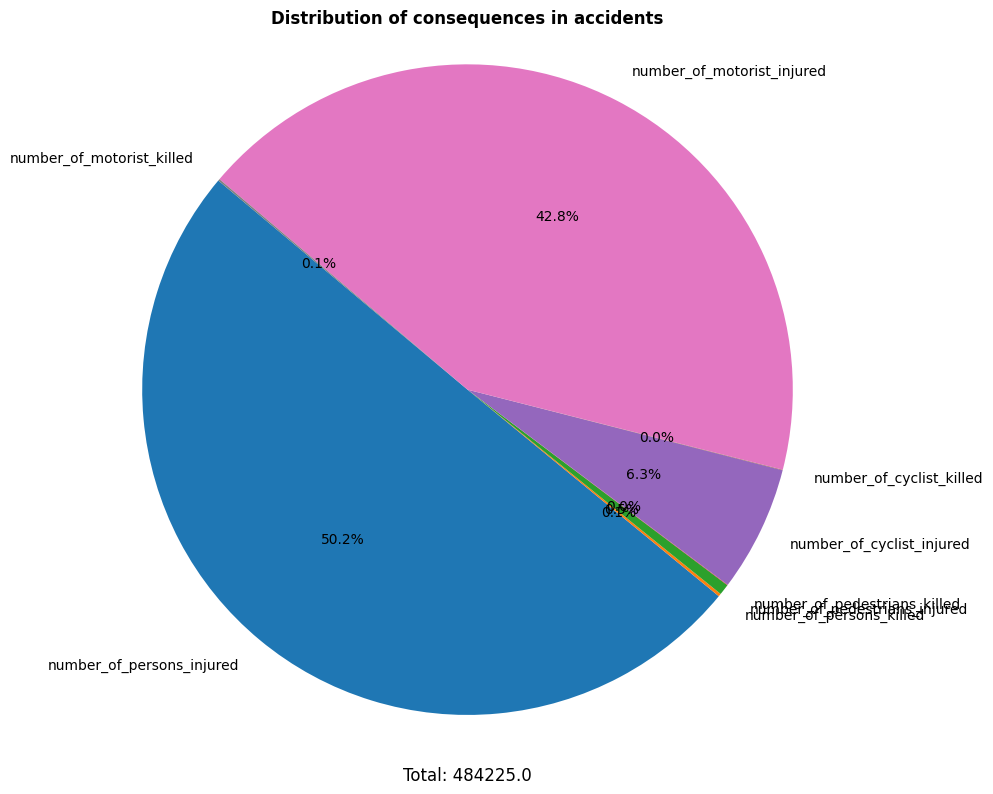

In [23]:
consequences = df[['number_of_persons_injured', 'number_of_persons_killed',
                   'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
                   'number_of_cyclist_injured', 'number_of_cyclist_killed',
                   'number_of_motorist_injured', 'number_of_motorist_killed']].sum()

labels = [col.split(' ')[-2:] for col in consequences.index]
labels = [' '.join(words).lower() for words in labels]

plt.figure(figsize=(10, 8))
plt.pie(consequences, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Distribution of consequences in accidents', fontweight = 'bold')

total_sum = consequences.sum()
plt.text(0, -1.2, f'Total: {total_sum}', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# Showing correlation

In [24]:
df.head()

,crash_date,crash_time,borough,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,...,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_hour,day,month,year,consequences_of_an_accident
9,2021-12-14,14:58:00,MANHATTAN,40.751440,-73.973970,3 AVENUE,EAST 43 STREET,0.0,0.0,0,...,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle,14,14,12,2021,0.0
11,2021-12-14,16:50:00,QUEENS,40.675884,-73.755770,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,...,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle,16,14,12,2021,0.0
14,2021-12-14,23:10:00,QUEENS,40.666840,-73.789410,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,...,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan,23,14,12,2021,4.0
18,2021-12-11,19:43:00,BRONX,40.872620,-73.904686,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,...,Unspecified,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,Sedan,19,11,12,2021,2.0
24,2021-12-13,17:40:00,STATEN ISLAND,40.631650,-74.087620,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,...,Unspecified,Unspecified,4487001,Sedan,Sedan,17,13,12,2021,2.0


In [25]:
df_sub = df.copy()
# extract day/month/year
df_sub['day'] = df['crash_date'].dt.day
df_sub['month'] = df['crash_date'].dt.month
df_sub['year'] = df['crash_date'].dt.year

In [26]:
label_encoder = LabelEncoder()

columns_to_encode = [
    'borough',
    'contributing_factor_vehicle_1',
    'contributing_factor_vehicle_2',
    'vehicle_type_code_2',
    'vehicle_type_code_1'
    ]

for col in columns_to_encode:
    df_sub[col] = label_encoder.fit_transform(df_sub[col])

In [27]:
df_sub.columns

Index(['crash_date', 'crash_time', 'borough', 'latitude', 'longitude',
       'on_street_name', 'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'crash_hour', 'day', 'month', 'year',
       'consequences_of_an_accident'],
      dtype='object')

In [28]:
df_sub['consequences_of_an_accident'] = df[[
    'number_of_persons_injured',
    'number_of_persons_killed',
    'number_of_pedestrians_injured',
    'number_of_pedestrians_killed',
    'number_of_cyclist_injured',
    'number_of_cyclist_killed',
    'number_of_motorist_injured',
    'number_of_motorist_killed'
    ]].sum(axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880392 entries, 9 to 2034017
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     880392 non-null  datetime64[ns]
 1   crash_time                     880392 non-null  object        
 2   borough                        880392 non-null  object        
 3   latitude                       880392 non-null  float64       
 4   longitude                      880392 non-null  float64       
 5   on_street_name                 880392 non-null  object        
 6   cross_street_name              880392 non-null  object        
 7   number_of_persons_injured      880392 non-null  float64       
 8   number_of_persons_killed       880392 non-null  float64       
 9   number_of_pedestrians_injured  880392 non-null  int64         
 10  number_of_pedestrians_killed   880392 non-null  int64         
 11 

In [30]:
df_sub = df_sub.drop(columns = [
    'crash_date',
    'crash_time',
    'on_street_name',
    'cross_street_name',
    'collision_id',
    'number_of_persons_injured',
    'number_of_persons_killed',
    'number_of_pedestrians_injured',
    'number_of_pedestrians_killed',
    'number_of_cyclist_injured',
    'number_of_cyclist_killed',
    'number_of_motorist_injured',
    'number_of_motorist_killed'
    ])

In [31]:
df_sub.head(10)

,borough,latitude,longitude,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,crash_hour,day,month,year,consequences_of_an_accident
9,2,40.751440,-73.973970,35,55,444,617,14,14,12,2021,0.0
11,3,40.675884,-73.755770,52,55,444,617,16,14,12,2021,0.0
14,3,40.666840,-73.789410,43,55,444,603,23,14,12,2021,4.0
18,0,40.872620,-73.904686,55,55,455,603,19,11,12,2021,2.0
24,4,40.631650,-74.087620,55,55,444,603,17,13,12,2021,2.0
27,1,40.687534,-73.977500,55,55,444,74,12,14,12,2021,2.0
28,1,40.710957,-73.951126,36,55,70,617,17,14,12,2021,2.0
45,0,40.843906,-73.924130,3,55,489,617,21,24,4,2022,0.0
51,2,40.767242,-73.986206,58,55,455,74,15,24,4,2022,2.0
52,1,40.624170,-73.970480,55,55,444,515,12,22,4,2022,2.0


In [32]:
overall_correlation = df_sub.corr()

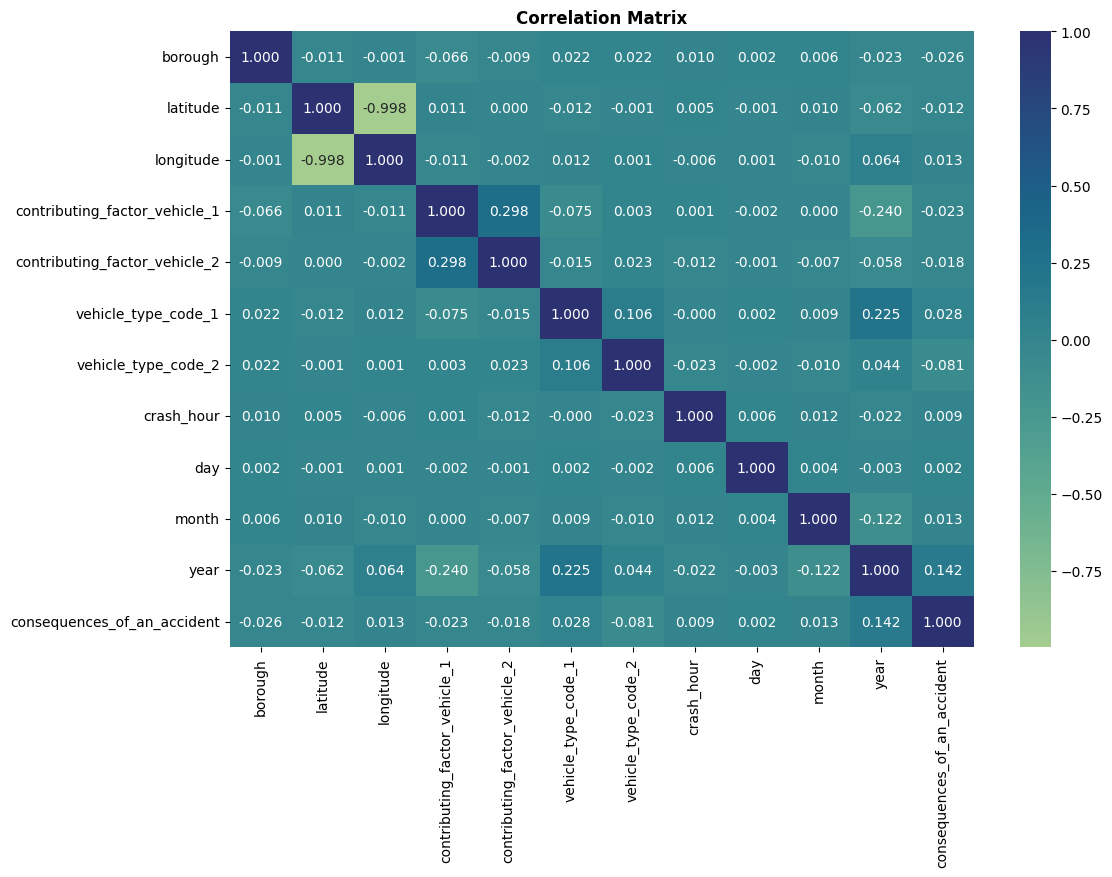

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(overall_correlation, annot = True, fmt='.3f', cmap = 'crest')

plt.title('Correlation Matrix', fontweight = 'bold')

plt.show()